Import the libraries pandas and numpy for data processing, matplotlib for visualization
,Import knn functions from sklearn for machine learning models

In [0]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

KNN algorithm (and weighted KNN) for breast-cancer-wisconsin dataset

In [0]:
names = ['sample-code','thickness','cell-size','cell-shape','marginal-adhesion',
        'epithelial-cell-size','bare-nuclei','bland-chromatin','normal-nucleoli','mitoses','class']


df = pd.read_csv('Data/Breast cancer/breast-cancer-wisconsin.data',names = names)
df = df.replace("?",4)
df["bare-nuclei"]=pd.to_numeric(df['bare-nuclei'])
df.fillna(df.mode(),inplace =True)

X = df.iloc[:,:-1].values
y = df.iloc[:,4].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)


# minkowski with p=2 -> euclidean distance and with p = 1 -> Manhattan distance
# proximity weighting specified by the inverse of the distance
classifier = KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p = 2, weights='distance')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)


Calculate the accuracy of the prediction 

In [85]:
print(accuracy_score(y_test,y_pred))

0.4142857142857143


In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55  8  5  4  0  3  0  3  7]
 [10  0  1  1  1  0  0  0  1]
 [ 5  1  1  1  0  0  0  0  0]
 [ 4  1  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  1]
 [ 4  0  0  0  0  0  0  0  1]
 [ 8  1  1  1  0  1  0  0  1]]
              precision    recall  f1-score   support

           1       0.60      0.65      0.62        85
           2       0.00      0.00      0.00        14
           3       0.12      0.12      0.12         8
           4       0.12      0.17      0.14         6
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
          10       0.07      0.08      0.07        13

    accuracy                           0.41       140
   macro avg       0.10      0.11      0.11       140
weighted avg       0.39      0.41      0.40       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Simulate KNN for different values of K

In [0]:
error = []
accuracy = {}
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i,metric= 'minkowski',p=2, weights='distance')
    knn.fit(X_train,y_train)
    accuracy[i] = accuracy_score(y_test,pred_i, normalize=False)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [102]:
print(max(accuracy.values()))

85


Plot the error against the K value

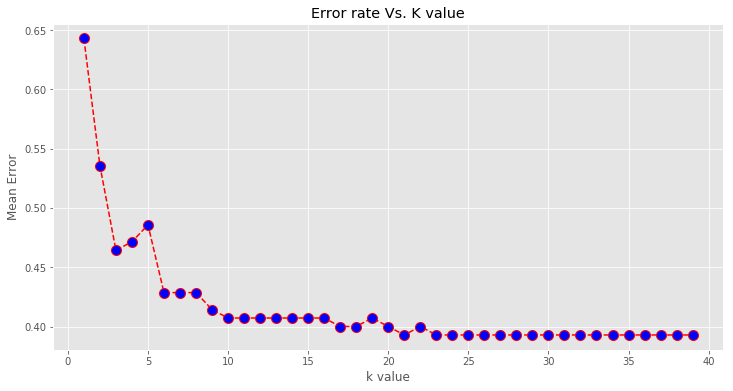

In [98]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize =10)
plt.title('Error rate Vs. K value')
plt.xlabel('k value')
plt.ylabel('Mean Error')
plt.show()

K-Nearest algorithm for the letter recognition dataset

In [0]:
df_ltr = pd.read_csv('Data/Letter recognition/letter-recognition.data')
X_ltr = df_ltr.iloc[:,1:17].values
y_ltr = df_ltr.iloc[:,0].values
X_train_ltr,X_test_ltr,y_train_ltr,y_test_ltr = train_test_split(X_ltr,y_ltr,test_size = 0.20, random_state = 1)


classifier_ltr =  KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p = 2, weights='distance')

classifier_ltr.fit(X_train_ltr,y_train_ltr)
y_pred_ltr = classifier_ltr.predict(X_test_ltr)




In [0]:
error_ltr = []
for i in range(1,40):
    knn_ltr = KNeighborsClassifier(n_neighbors = i,metric='minkowski',p = 2, weights='distance')
    knn_ltr.fit(X_train_ltr,y_train_ltr)
    pred_i_ltr = knn_ltr.predict(X_test_ltr)
    error_ltr.append(np.mean(pred_i_ltr != y_test_ltr))



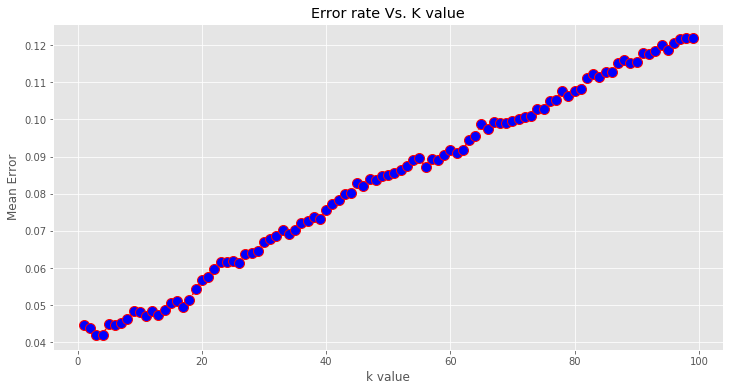

In [96]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_ltr,color='red',linestyle='dashed',marker='o',
         markerfacecolor='blue',markersize =10)
plt.title('Error rate Vs. K value')
plt.xlabel('k value')
plt.ylabel('Mean Error')
plt.show()